# Rešavanje sistema ODJ

#### Mnogi realni problemi, kao npr. trenutno aktnuelno širenja virusa u pouplaciji, modeluju se pomoću sistema diferencijalnih jednačina.
#### Sistemi diferncijalnih jednačina se takođe koriste pri rešavanju ODJ reda višeg od 1.
#### Iz tih razloga, prvi deo današnjeg predavanja posvećen je numeričkim metodama za rešavanja sistema ODJ.
#### Suština sistema ODJ je da imamo više ODJ koje modeluju fenomene koji zavise jedan od drugog, pa se zato jedančine moraju rešavati simultano (zajedno) kao sistem.
#### Na primer, Lotka-Volterra model populacija predatora i plena predstavlja sistem od dve jedančine koje se formiraju po sledećim pretpostavkama:
#### 1. Plen raste stopom koja je proporicionalana trenutnoj populaciji plena, ako nema predatora.
#### 2. Populacija predatora smanjuje se stopom koja je proporicionalana trenutnoj populaciji predatora, ako nema plena. 
#### 3. Broj susreta predatora i plena proporcionalan je proizvodu njihovih polulacija.
#### 4. Svaki susret predatora i plena povećava polulaciju predatora i smanjuje populaciju plena.
#### Na osnovu prethodne 4 pretpostavke foriran je sledeći sistem ODJ:
#### $$y_1′=ay_1-by_1y_2\\y_2′=cy_1y_2−dy_2$$
<!---videti https://www.simulistics.com/drupal/files/tutorials/predprey/predprey.pdf -->
#### gde je $a>0$, stopa rasta plena, $b>0$ stopa opadanja plena pri intreakciji sa predatorom, $c>0$ stopa porasta predatora pri intreakciji sa plenom, i $d>0$ stopa smanjenja predatora.
#### Vidimo da, da populacija plena u nekom trenutku zavisi od populacije predatora i obrnuto, pa jednačine ne možemo da rešavamo odvojeno.
#### Sistem jednačina Lotka-Volterra modela se u praksi najčešće rešava baš numeričkim metodama zato što su jednačine nelinearne.
## Numeričke metode za rešavanje sistema ODJ
#### Sistema ODJ rešavamo pomoću svih numeričkih metoda za rešavanje ODJ koje smo učili, samo što sada te metode primenjujemo na više jedančina istovremeno.
#### Prilikom primena numeričkih metoda, sisteme ODJ reprezentujemo pomoću vektora jedančina i vektora početnih uslova:
### $$F(x,Y)=\begin{bmatrix}f_1(x,y)\\f_2(x,y)\\\dots\\f_n(x,y)\end{bmatrix} \hspace{0.8em} Y_0=Y(x_0)=\begin{bmatrix}y_1(x_0)\\y_2(x_0)\\\dots\\y_n(x_0)\end{bmatrix}$$
#### Pokazaćemo sada primer jednog sistema za Lotka-Volterra model na koji ćemo primeniti Ojlerov metod.
#### $y_1′=0.5y_1−0.2y_1y_2=y_1(0.5−0.2y_2)\\y_2′=0.004y_1y_2−0.4y_2=y_2(0.04y_1−0.4)\\y_1(0)=200, y_2(0)=30$
#### $F(x,y)=\begin{bmatrix}y_1(0.5−0.2y_2)\\y_2(0.04y_1−0.4)\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}200\\30\end{bmatrix}$
## Ojlerov metod za sisteme ODJ:
#### Ojlerov metod za rešavanje sistema ODJ funkcioniše na istin način kao kada rešavamo jednu jednačinu, samo ga sada primenjuemo na vektore jedanačina. Iz tog razloga formulu prikazujemo pomoću vektorskih oznaka:
### $$Y(x_{i+1})=Y(x_{i})+hF(x_i,Y_i)$$
#### Primenjujemo sada Ojlerov metod na sistem za predator-plen model. Koristimo $h=0.1$:
#### $Y(0+0.1)=Y(0,Y_0)+0.1F(0,Y_0)$
#### $Y_1=Y(0.1)=\begin{bmatrix}200\\30\end{bmatrix}+0.1\begin{bmatrix}y_1(0.5−0.2y_2)\\y_2(0.04y_1−0.4)\end{bmatrix}$
#### $Y_1=Y(0.1)=\begin{bmatrix}200\\30\end{bmatrix}+0.1\begin{bmatrix}200(0.5−0.2\cdot 30)\\30(0.04\cdot 200−0.4)\end{bmatrix}$
#### $Y_1=Y(0.1)=\begin{bmatrix}200\\30\end{bmatrix}+0.1\begin{bmatrix}-2\\1.2\end{bmatrix}$
#### $Y_1=Y(0.1)=\begin{bmatrix}198\\31.2\end{bmatrix}$
#### Uradićemo sada još jedan korak.
#### $Y_2=Y(0.1+0.1)=Y_1+0.1F(0.1,Y_1)$
#### $Y_2=Y(0.2)=\begin{bmatrix}198\\31.2\end{bmatrix}+0.1\begin{bmatrix}y_1(0.5−0.2y_2)\\y_2(0.04y_1−0.4)\end{bmatrix}$
#### $Y_2=Y(0.2)=\begin{bmatrix}198\\31.2\end{bmatrix}+0.1\begin{bmatrix}198(0.5−0.2\cdot 31.2)\\31.2(0.04\cdot 198−0.4)\end{bmatrix}$
#### $Y_2=Y(0.2)=\begin{bmatrix}195.545\\32.423\end{bmatrix}$

#### Napisaćemo sada kod za Ojerlov metod za rešavanje sistema ODJ. Razlika u odnosu na funkciju koja se primenjuje na jednu jednačinu je u tome da sada radimo sa matricama, a ne vektorima. 
#### Matrica $Y$ kao prvu kolonu sadrži vektor početnih rešenja, dok ostale kolone popunjavamo pomoću formule za Ojlerov metod. Formula može direktno implementirati (bez for petlji) jer MATLAB i Octave rade sa vektorima.
#### Još jedna razlika u odnosu na kod koji smo pisali na prošlom predavanju je da sada nemamo fiksnu krajnju tačku već zadajemo broj koraka primene metoda.

In [70]:
function [Y,X]=ojler_sistem(x0,y0,h,odj,br_koraka)
    n = length(y0);
    Y = zeros(n,br_koraka);
    X = zeros(n,br_koraka);
    Y(:,1) = y0';
    X(:,1) = x0';
    for i=2:br_koraka
        X(:,i) = X(:,i-1) + h;
        Y(:,i) = Y(:,i-1) + h*feval(odj,X(:,i-1),Y(:,i-1));
    end
endfunction

#### Zadajemo sada sistem kao jedan vektor koji ima 1 kolonu i onoliko vrsta koliko ima jedančina u sistemu. Svaka jedančina je jedan element tog vektora.

In [71]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1)=y(1)*(0.5-0.02*y(2));
    z(2)=y(2)*(0.004*y(1)-0.4);
endfunction

#### Pozivamo sada funkciju koju smo napisali. Početne vrednosti su sada vektori.

In [72]:
x0=[0,0];
y0=[200,30];
h=0.1;
br_koraka=10;
[Y,X]=ojler_sistem(x0,y0,h,'odj_sistem',br_koraka)

Y =

 Columns 1 through 8:

   200.000   198.000   195.545   192.642   189.304   185.552   181.412   176.915
    30.000    31.200    32.423    33.662    34.910    36.157    37.394    38.612

 Columns 9 and 10:

   172.099   167.005
    39.800    40.947

X =

 Columns 1 through 8:

   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000
   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000

 Columns 9 and 10:

   0.80000   0.90000
   0.80000   0.90000



#### Povećavamo broj koraka i crtamo grafik rešenja.

In [73]:
x0=[0,0];
y0=[200,30];
h=0.1;
br_koraka=1000;
[Y_o,X]=ojler_sistem(x0,y0,h,'odj_sistem',br_koraka);

#### Prikazujemo sada rešenja obe jednačine na jednom grafiku. U zavisnosti od početnih uslova možemo da vidimo šta će se dodogiti sa populacijama predatora i plena kroz vreme.

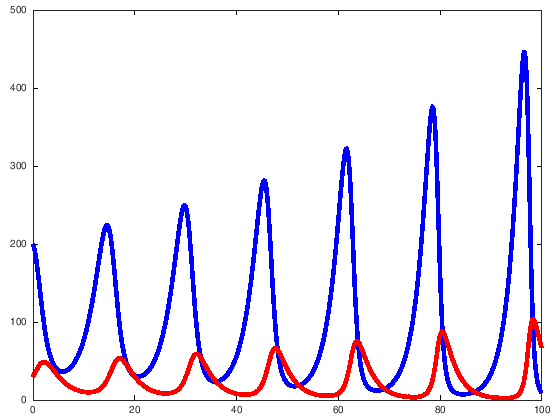

In [74]:
plot(X(1,:),Y_o(1,:), "linewidth",14, "color", "blue")
hold on;
plot(X(2,:),Y_o(2,:), "linewidth",14, "color", "red")

#### Na isti način na koji smo implementirali Ojlerov metod mogu se implementirati sve druge numeričke metode za rešvanje pojedničanih jednačina.
#### U nastavku je prikazan primer primene Heunovog metoda, a nakon toga i kod za Heunov metod.
#### $Y(x_{i+1})^0=Y(x_{i})+hF(x_i,Y_i)$
#### $Y(x_{i+1})=Y(x_{i})+\frac{1}{2}h(F(x_i,Y_i)+F(x_{i+1},Y_{i+1}^0))$
#### Primenjujemo sada Heunov metod na sistem za predator-plen model:
#### $F(x,y)=\begin{bmatrix}y_1(0.5−0.2y_2)\\y_2(0.04y_1−0.4)\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}200\\30\end{bmatrix}$
#### Koristimo $h=0.1$:
#### $Y(0+0.1)^0=Y(0,Y_0)+0.1F(0,Y_0)$
#### $Y(0.1)^0=\begin{bmatrix}200\\30\end{bmatrix}+0.1\begin{bmatrix}200(0.5−0.2\cdot 30)\\30(0.04\cdot 200−0.4)\end{bmatrix}=\begin{bmatrix}198\\31.2\end{bmatrix}$
#### $Y_1^=Y(0.1)^1=\begin{bmatrix}200\\30\end{bmatrix}+\frac{1}{2}\cdot 0.1(\begin{bmatrix}200(0.5−0.2\cdot 30)\\30(0.04\cdot 200−0.4)\end{bmatrix}+ \begin{bmatrix}198(0.5−0.2 \cdot 31.2)\\31.2(0.004 \cdot 198−0.4)\end{bmatrix})=\begin{bmatrix}197.772\\31.212\end{bmatrix}$

In [76]:
function [Y,X]=heun_sistem(x0,y0,h,odj,br_koraka)
    n = length(y0);
    Y = zeros(n,br_koraka);
    X = zeros(n,br_koraka);
    Y(:,1) = y0';
    X(:,1) = x0';
    for i=2:br_koraka
        X(:,i) = X(:,i-1) + h;
        Y(:,i) = Y(:,i-1) + h*feval(odj,X(:,i-1),Y(:,i-1));
        Y(:,i) = Y(:,i-1) + h*(feval(odj,X(:,i-1),Y(:,i-1))+feval(odj,X(:,i),Y(:,i)))/2;
    end
endfunction

In [77]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1,1)=y(1)*(0.5-0.02*y(2));
    z(2,1)=y(2)*(0.004*y(1)-0.4);
endfunction

In [78]:
x0=[0,0];
y0=[200,30];
h=0.1;
br_koraka=5;
[Y,X]=heun_sistem(x0,y0,h,'odj_sistem',br_koraka)

Y =

   200.000   197.772   195.092   191.974   188.437
    30.000    31.212    32.440    33.678    34.916

X =

   0.00000   0.10000   0.20000   0.30000   0.40000
   0.00000   0.10000   0.20000   0.30000   0.40000



In [79]:
x0=[0,0];
y0=[200,30];
h=0.1;
br_koraka=1000;
[Y_h,X]=heun_sistem(x0,y0,h,'odj_sistem',br_koraka);

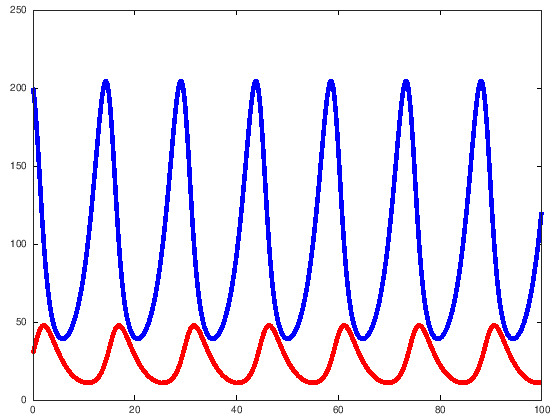

In [80]:
plot(X(1,:),Y_h(1,:), "linewidth",14, "color", "blue")
hold on;
plot(X(2,:),Y_h(2,:), "linewidth",14, "color", "red")

In [81]:
function [Y,X]=RungeKutta4_sistem(x0,y0,h,odj,br_koraka)
    n = length(y0);
    Y = zeros(n,br_koraka);
    X = zeros(n,br_koraka);
    Y(:,1) = y0';
    X(:,1) = x0';
    for i=2:br_koraka
        X(:,i) = X(:,i-1) + h;
        k1=h*feval(odj,X(:,i-1),Y(:,i-1));
        k2=h*feval(odj,X(:,i-1)+1/2*h,Y(:,i-1)+1/2*k1);
        k3=h*feval(odj,X(:,i-1)+1/2*h,Y(:,i-1)+1/2*k2);
        k4=h*feval(odj,X(:,i-1)+h,Y(:,i-1)+k3);
        Y(:,i)=Y(:,i-1)+1/6*(k1+2*k2+2*k3+k4);
    end
endfunction

In [82]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1,1)=y(1)*(0.5-0.02*y(2));
    z(2,1)=y(2)*(0.004*y(1)-0.4);
endfunction

In [83]:
x0=[0,0];
y0=[200,30];
h=0.1;
br_koraka=1000;
[Y_r,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka);

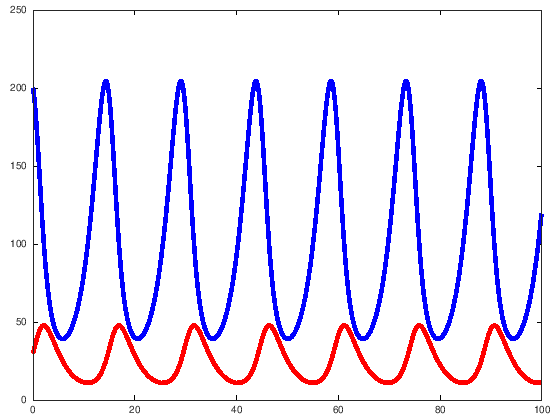

In [84]:
plot(X(1,:),Y_r(1,:), "linewidth",14, "color", "blue")
hold on;
plot(X(2,:),Y_r(2,:), "linewidth",14, "color", "red")

#### Uporedićemo sada Ojlerov metod redom sa Heunovim. Ojlerov metod označen je plavom i crvenom bojom.

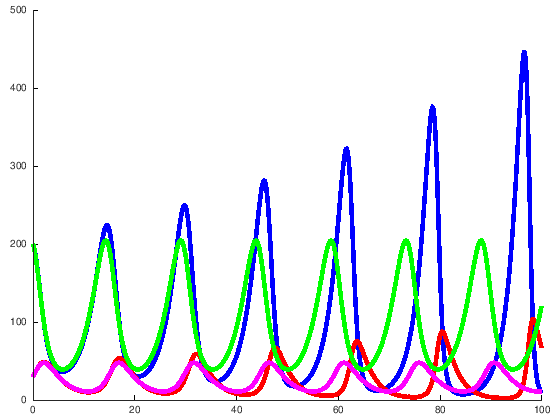

In [85]:
hold on;
plot(X(1,:),Y_o(1,:), "linewidth",14, "color", "blue")
plot(X(2,:),Y_o(2,:), "linewidth",14, "color", "red")
plot(X(1,:),Y_h(1,:), "linewidth",14, "color", "green")
plot(X(2,:),Y_h(2,:), "linewidth",14, "color", "magenta")

#### Uporedićemo sada Ojlerov metod redom sa RK4. Ojlerov metod označen je plavom i crvenom bojom.

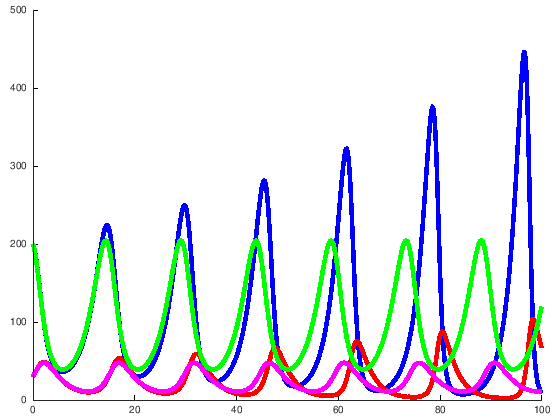

In [86]:
hold on;
plot(X(1,:),Y_o(1,:), "linewidth",14, "color", "blue")
plot(X(2,:),Y_o(2,:), "linewidth",14, "color", "red")
plot(X(1,:),Y_r(1,:), "linewidth",14, "color", "green")
plot(X(2,:),Y_r(2,:), "linewidth",14, "color", "magenta")

#### Rešenje dobijeno Ojlerovom metodom razlikuje se od rešenja dobijenog Heunovom i RK4 metodom. Sa obzirom da Ojlerov metod vrši najgrublju procenu sledeće tačke, on generalno daje loše rezultate kada je rešenje funkcija koja osciluje, što je čest slučaj kod ovog predator-plen modela.

### Primenićemo sada Ojlerov metod na još jedan primer.
### $y_1′=y_2\\y_2′=1-y_1\\y_1(0)=1, y_2(0)=-2$
### $F(x,y)=\begin{bmatrix}y_2\\1-y_1\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}-1\\1\end{bmatrix}$
#### Kod ovog primera izvod prve funkcije koju tražimo je druga funkciju koju tražimo. Takve sisteme dobijamo kada rešavamo ODJ reda većeg od 1 pa iz tog razloga obrađujemo baš ovakav primer.
#### $Y(0+0.1)=Y(0,Y_0)+0.1F(0,Y_0)$
#### $Y_1=Y(0.1)=\begin{bmatrix}-1\\1\end{bmatrix}+0.1\begin{bmatrix}1\\1-(-1)\end{bmatrix}=\begin{bmatrix}-0.9\\1.2\end{bmatrix}$
#### $Y_1=Y(0.2)=\begin{bmatrix}-0.9\\1.2\end{bmatrix}+0.1\begin{bmatrix}1.2\\1-(-0.9)\end{bmatrix}=\begin{bmatrix}-0.78\\1.39\end{bmatrix}$

In [87]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1,1)=y(2);
    z(2,1)=1-y(1);
end

In [88]:
x0=[0,0];
y0=[-1,1];
h=0.1;
br_koraka=50;
[Y,X]=ojler_sistem(x0,y0,h,'odj_sistem',br_koraka);

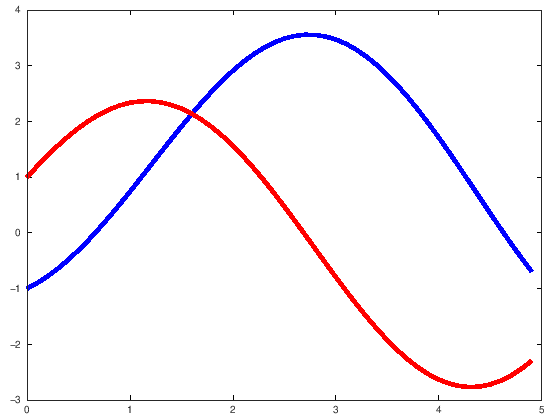

In [89]:
plot(X(1,:),Y(1,:), "linewidth",14,  "color", "blue")
hold on;
plot(X(2,:),Y(2,:), "linewidth",14,  "color", "red")

#### Prethodni sistem u stvari predastavlja diferencijalnu jednačinu druog reda oblika:
### $$\ddot{y}+y=1, \hspace{0.5em} y(0)=-1,\dot{y}(0)=1$$
#### Funkcija $y_1(x)$, označena plavom bojom na grafiku iznad, predstavlja rešenje date diferencijalne jednačine drugog reda, dok funkcija $y_2(x)$, označena crevnom bojom na grafiku iznad, predstavlja prvi izvod funkcije $y_1(x)$.
#### Sa grafika se vidi da prvi izvod počinje da bude negativan negde između 2 i 3, pa tada funkcija kreće da opada. Takođe se vidi da je ekstrem (u ovom slučaju maksimum) funkcije je u tački u kojoj prvi izvod ima vrednost 0.

## Rešavanje ODJ višeg reda
#### Videli samo da se ODJ višeg reda može rešavati kao sistem ODJ. U nastavku ćemo pokazati na koji način se ODJ višeg reda konvertuje u sistem ODJ.
#### Navodimo prvo korake procesa konverzije, pa onda nekoliko primera.
#### 1. Uvodimo nove zavisne promenljive. Uzimamo zavisnu promenljivu i sve njene izvode do jednog manje reda od najvećeg. Zamenjujemo ih novim promenljivima.
#### 2. Zapisujemo datu diferencijalnu jednačinu u drugom obliku upotrebom novih zavisnih promenljivih tako što dodajemo po jednu jednačinu za svaku novu zavisnu promenljivu.
#### Primer 1.
#### $$\ddot{y}+y=1, \hspace{0.5em} y(0)=-1,\dot{y}=1$$
#### Nove zavisne promenljive su:
#### $$y_1=y\\y_2=\dot{y}$$
#### Prva nova jednačina je:
#### $$\dot{y_1}=y_2$$
#### Druga nova jednačina je:
#### $$\dot{y_2}+y_1=1 \implies \dot{y_2}=1-y_1$$
#### Dobijeni sistem u matričnom obliku:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\1-y_1\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}-1\\1\end{bmatrix}$$
#### Primer 2.
#### $$\dddot{y}+2\ddot{y}+2\dot{y}+8y=1, \hspace{0.5em} y(0)=4,\dot{y}(0)=1,\ddot{y}(0)=9$$
#### Nove zavisne promenljive su:
#### $$y_1=y\\y_2=\dot{y}\\y_3=\ddot{y}$$
#### Prva nova jednačina je:
#### $$\dot{y_1}=y_2$$
#### Prva nova jednačina je:
#### $$\dot{y_2}=y_3$$
#### Druga nova jednačina je:
#### $$\dot{y_3}+2y_3+2y_2+8y_1=1 \implies \dot{y_3}=1-2y_3-2y_2-8y_1$$
#### Dobijeni sistem u matričnom obliku:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\\\dot{y_3}\end{bmatrix}=\begin{bmatrix}y_2\\y_3\\1-2y_3-2y_2-8y_1\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}4\\1\\9\end{bmatrix}$$
#### Dakle, videli smo na koji način se vrši konverzija ODJ višeg reda. U nastavku rešavamo prethodni Primer 2. pomoću RK4 metode.

In [91]:
function z=odj_sistem(x,y)
    z=zeros(3,1);
    z(1,1)=y(2);
    z(2,1)=y(3);
    z(3,1)=1-2*y(3)-2*y(2)-8*y(1);
end

In [92]:
x0=[0,0,0];
y0=[4,1,9];
h=0.1;
br_koraka=50;
[Y_r,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka);

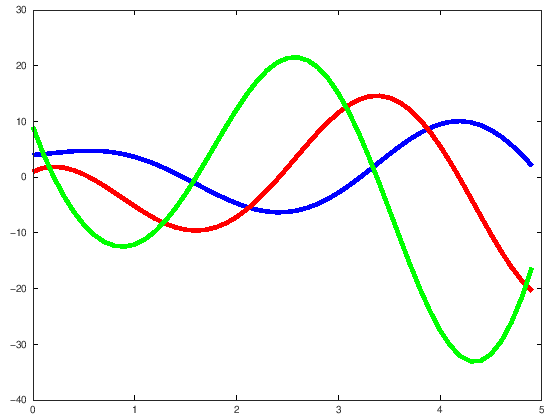

In [93]:
plot(X(1,:),Y_r(1,:), "linewidth",14, "color", "blue")
hold on;
plot(X(2,:),Y_r(2,:), "linewidth",14, "color", "red")
plot(X(3,:),Y_r(3,:), "linewidth",14, "color", "green")

#### Funkcija $y_1(x)$, označena plavom bojom na grafiku iznad, predstavlja rešenje date diferencijalne jednačine trećeg reda. Funkcija $y_2(x)$, označena crvenom bojom, je prvi izvod funkcije $y_1(x)$. Funkcija $y_3(x)$, označena zelenom bojom je drugi izvod funkcije $y_1(x)$.
#### Sa grafika na primer možemo da vidimo da je funkcija konveksna tamo gde je drugi izvod veći od 0, a konkavna tamo gde je manji od 0.

# Problem graničnih uslova (PGU)
#### Za razliku od probema početnih uslova, kod problema graničnih uslova početni uslovi zadati su u više tačka, tipično na granicama nekog regiona na kome se rešava diferencijalna jednačina.
#### Na ovom krusu razmatraćemo samo probleme kod kojih su početni uslovi zadati u dve tačke.
#### Na primer, sledeća jednačina drugog reda (koju smo rešavali gore) može se rešavati tako da zahtevamo da rešenje (funkcija $y(x)$) u tački 1 ima vrednost 2:
#### $$\ddot{y}+y=1, \hspace{0.5em} y(0)=-1,y(1)=2$$
#### Primetite da sada nemamo dat početni uslov za prvi izvod funkcije.

## Metod gađanja
#### Prvi metod za rešavanje PGU koji ćemo pokazati je metod gađanja ($shooting$ $method$).
#### Kod ovog metoda meta nam je drugi granični uslov, a u nastavku ćemo pokazati kako gađamo, tj. kako nišanimo.
#### Korake metoda gađanja objašnjavamo na primeru. Rešavamo sledeći problem:
#### $$\ddot{y}+y=1, \hspace{0.5em} y(0)=-1,y(1)=2$$
#### Prvi korak je konverzija u sistem ODJ. Konverziju smo već uradili gore, a dobijeni sistem u matričnom obliku je:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\1-y_1\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}-1\\?\end{bmatrix}$$
#### Da li možemo primenimo neki od numeričkih metoda da rešimo sistem?
#### Očigledno da ne možemo jer nam nedostaje početni uslov za prvi izvod. Naš problem je zadat na takav način da umesto toga znamo vrednost funkcije $y(x)$ u nekoj drugoj tački.
#### Drugi korak metoda gađanje je zadavanje početnih uslova koji nedostaju. To je korak u kome nišanimo. Ako gađamo prvi put, početni uslov biramo na slučajan način. Recimo da smo odabrali vrednost 0:
#### $$\ddot{y}+y=1, \hspace{0.5em} y(0)=-1,\dot{y}=y_2(0)=0$$
#### Rešavamo sada zadati sistem pomoću nekog numeričkog metoda, na primer RK4.

In [94]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1,1)=y(2);
    z(2,1)=1-y(1);
end

In [95]:
x0=[0,0];
y0=[-1,0];
h=0.1;
br_koraka=11;
[Y_r,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka)

Y_r =

 Columns 1 through 8:

  -1.00000  -0.99001  -0.96013  -0.91067  -0.84212  -0.75517  -0.65067  -0.52969
   0.00000   0.19967   0.39734   0.59104   0.77884   0.95885   1.12928   1.28843

 Columns 9 through 11:

  -0.39341  -0.24322  -0.08061
   1.43471   1.56665   1.68294

X =

 Columns 1 through 8:

   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000
   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000

 Columns 9 through 11:

   0.80000   0.90000   1.00000
   0.80000   0.90000   1.00000



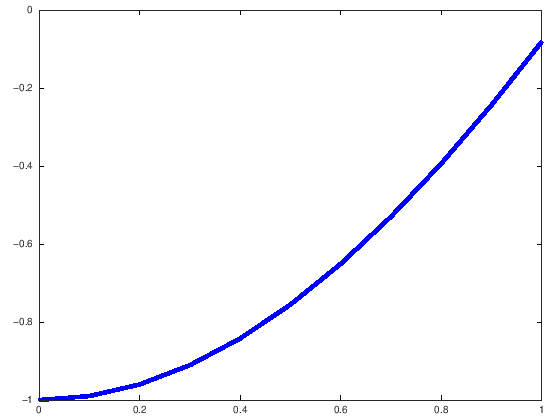

In [96]:
plot(X(1,:),Y_r(1,:), "linewidth",14, "color", "blue")

#### Provervamo da li je zadati granični uslov zadovoljen.
#### Iz rešenja se vidi da je vrednost graničnog uslova:
#### $$y(1)=-0.08$$
#### Dakle, granični uslov nije pogođen. Moramo da gađamo ponovo.
#### Kada drugi put nišanimo početni uslov koji nedostaje takođe biramo proizvoljno.
#### Recimo da smo odabrali vrednost 4:
#### $$\ddot{y}+\dot{y}=1, \hspace{0.5em} y(0)=-1,\dot{y}=y_2(0)=4$$
#### Rešavamo sada zadati sistem pomoću nekog numeričkog metoda, na primer RK4.

In [97]:
x0=[0,0];
y0=[-1,4];
h=0.1;
br_koraka=11;
[Y_r,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka)

Y_r =

 Columns 1 through 8:

  -1.00000  -0.59067  -0.16546   0.27141   0.71555   1.16254   1.60790   2.04718
   4.00000   4.17968   4.31760   4.41239   4.46308   4.46918   4.43063   4.34780

 Columns 9 through 11:

   2.47601   2.89008   3.28528
   4.22154   4.05309   3.84415

X =

 Columns 1 through 8:

   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000
   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000

 Columns 9 through 11:

   0.80000   0.90000   1.00000
   0.80000   0.90000   1.00000



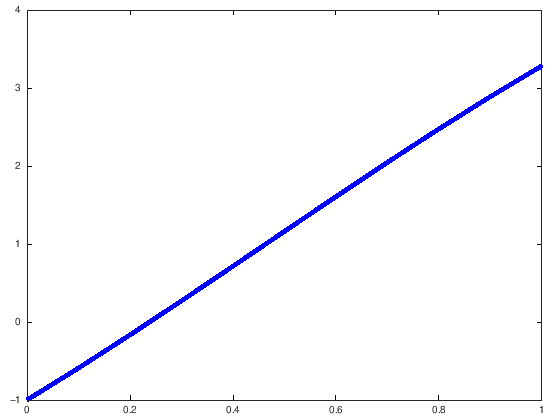

In [98]:
plot(X(1,:),Y_r(1,:), "linewidth",14, "color", "blue")

#### Provervamo da li je zadati granični uslov zadovoljen.
#### Iz rešenja se vidi da je vrednost graničnog uslova:
#### $$y(1)=3.28$$
#### Dakle, granični uslov nije pogođen. Moramo da gađamo ponovo.
#### Sada možemo da nišanimo pametnije. Upotrebićemo prethodna dva gađanja da zaključimo kako treba da nišanimo treći put.
#### Hajde prvo da prikažemo naša gađanja na grafiku. Na $x$ osi je početni uslov koji smo birali, a na $y$ osi je granični uslov koji smo dobili.

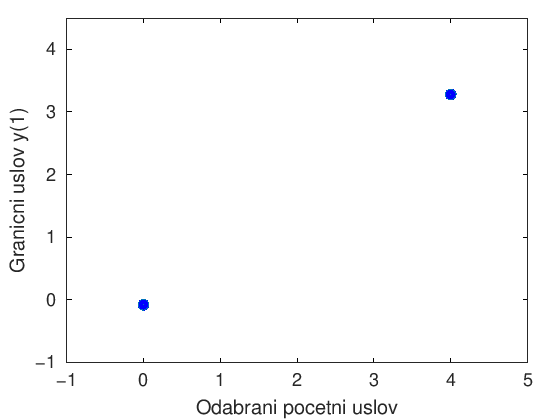

In [99]:
x=[0,4];
y=[-0.08, 3.28];
plot(x,y,'o','markersize', 10,'markerfacecolor','b')
axis([-1 5 -1 4.5])
xlabel('Odabrani pocetni uslov');
ylabel('Granicni uslov y(1)');
set(gca, "fontsize", 18)

#### Upotrebićemo sada interpolaciju da odredimo pravu kroz naša prva dva gađanja.

In [100]:
function p=linterp(x,y)
    n=length(x);
    p = 0;
    for i=1:n
        L=1;
        for j=1:n  
            if i~=j
                L = conv(L,[1 -x(j)]/(x(i)-x(j)));
            end
        end
        p = p + y(i)*L;
    end
endfunction

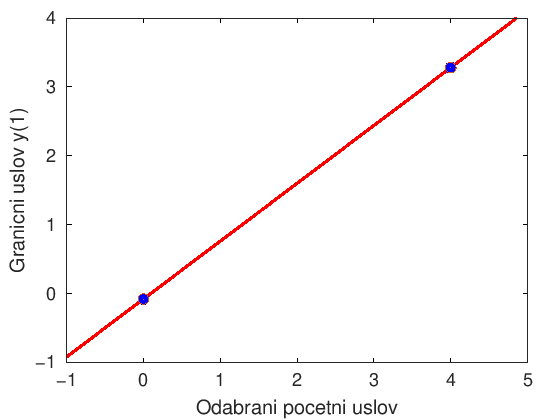

In [101]:
x=[0,4];
y=[-0.08, 3.28];
p=linterp(x,y);
xp=-1:0.1:5;
plot(xp,polyval(p,xp),"linewidth",8, "color", "red")
hold on;
plot(x,y,'o','markersize', 10,'markerfacecolor','b')
axis([-1 5 -1 4])
xlabel('Odabrani pocetni uslov');
ylabel('Granicni uslov y(1)');
set(gca, "fontsize", 18)

#### Sa grafika se vidi da bi trebalo da nišanimo tako da odaberemo početni uslov negde oko 3 da bi pogodili metu granični uslov $y(1)=2.$
#### Na koji način možemo da dobijemo tačan početni uslov koji treba da odaberemo?
#### Treba da odredimo vrednost na x-osi u kojoj data prava ima vrednost 2, što možemo svesti na određivanje nule polinoma prvog stepena.
#### Ako je prava koju smo dobili $f(x)=kx+n$ mi tražimo x za koje važi $f(x)=2$, tj. $kx+n-2=0$.
#### Koristimo na primer metod polovljenja

In [102]:
function x=polovljenje(a,b,funkcija,maxIter,tacnost)
fa=feval(funkcija,a);
fb=feval(funkcija,b);
if fa*fb<0
    for i=1:maxIter
        fa=feval(funkcija,a);
        fb=feval(funkcija,b);
        
        c=(a+b)/2;
        fc=feval(funkcija,c);
        if fc==0 || abs(a-b)<tacnost
            break;
        end

        if fa*fc<0
            b=c;
        else
            a=c;
        end
    end
    x=c;
end
endfunction

In [103]:
x=[0,4];
y=[-0.08, 3.28];
p=linterp(x,y)

p =

   0.840000  -0.080000



In [104]:
x=polovljenje(2,3.5,@(x)0.84*x-0.08-2,10,10^-5)

x =  2.4761


In [105]:
x0=[0,0];
y0=[-1,2.4761];
h=0.1;
br_koraka=11;
[Y_r,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka)

Y_r =

 Columns 1 through 8:

  -1.00000  -0.74281  -0.46821  -0.17894   0.12212   0.43194   0.74744   1.06546
   2.47610   2.66340   2.82408   2.95655   3.05948   3.13183   3.17290   3.18226

 Columns 9 through 11:

   1.38283   1.69637   2.00296
   3.15983   3.10582   3.02079

X =

 Columns 1 through 8:

   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000
   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000

 Columns 9 through 11:

   0.80000   0.90000   1.00000
   0.80000   0.90000   1.00000



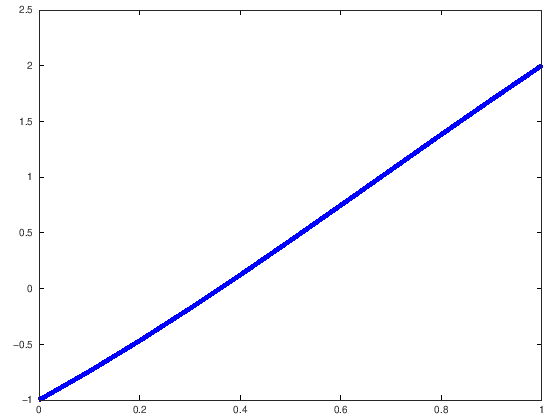

In [106]:
plot(X(1,:),Y_r(1,:), "linewidth",14, "color", "blue")

#### Iz rezultata RK4 metoda, a i sa grafika može se videti da je granični uslov zadovljen, odnosno da važi $y(1)=2$.
#### Dakle, dobili smo rešenje problema graničnih uslova i to je prva vrsta matrice Y vrednosti koju je vratio RK4 metod (što je i prikazano na prethodnom grafiku).
#### Pokazaćemo kako je izgledao grafik naših gađanja, da bi ilustrovali zašto se ovaj metod zove baš metod gađanja.
#### Prvo gađanje je označeno plavom, drugo crevenom i treće zelnom bojom.

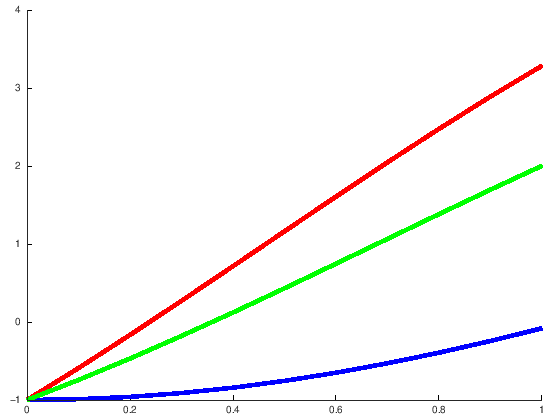

In [107]:
x0=[0,0];
y0=[-1,0];
h=0.1;
br_koraka=11;
[Y_r_1,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka);

y0=[-1,4];
[Y_r_2,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka);

y0=[-1,2.4761];
[Y_r_3,X]=RungeKutta4_sistem(x0,y0,h,'odj_sistem',br_koraka);

hold on;
plot(X(1,:),Y_r_1(1,:), "linewidth",14, "color", "blue")
plot(X(1,:),Y_r_2(1,:), "linewidth",14, "color", "red")
plot(X(1,:),Y_r_3(1,:), "linewidth",14, "color", "green")

#### Sa grafika se vidi da smo gađali 3 puta. Svaki put je početni uslov $y(0)=-1$ bio isti, ali se početni uslov $\dot{y}(0)$ razlikovao. Trećim gađanjem (zelena boja) pogodili smo metu $y(1)=2$.

### Algoritam metode gađanja
#### Sistematizovaćemo sada korake metode gađanja koje smo pokazali izad.
#### Dat nam je problem graničnih uslova.
#### Korak 1: Konvertujemo probelm u sistem ODJ.
#### Korak 2: Na slučajan način biramo početni uslov koji nedostaje.
#### Korak 3: Rešavamo sistem ODJ nekom od numeričkih metoda.
#### Korak 4: Proveravamo da li je zadovoljen drugi granični uslov.
#### Korak 5: Ako je drugi granični uslov zadovoljen, završavamo algoritam. Ako nije, a nemamo bar dva gađanja, vraćamo se na korak 2, inače prelazimo na sledeći korak.
#### Korak 6. Ako imamo bar dva gađanja, odnosno dva odabira početnog uslova i dva rezultata za granični uslov, koristimo linearnu interpolaciju da odredimo koji tačno početni uslov treba da biramo.
#### Korak 7. Rešavamo sistem ODJ uz početni uslov iz koraka 6. i tako dobijamo rešenje.

#### Metoda gađanja - primer 2.
#### Primenićemo sada metodu gađanja na još jedan primer, ali ovog puta većinu koraka izvodimo ručno, tj. bez pomoći Octave.
#### $$\ddot{y}-4y+4x=0, \hspace{0.5em} y(0)=1,y(1)=2$$
#### Korak 1: Kovertujemo ODJ drugog reda u sistem:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\4(y_1-x)\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}1\\?\end{bmatrix}$$
#### Korak 2: Biramo početni uslov:
#### $$\dot{y}=y_2(0)=0$$
#### Korak 3: Rešavamo sledeći sistem:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\4(y_1-x)\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}1\\0\end{bmatrix}$$
#### Koristimo Ojlerov metod i biramo $h=1$ da bi u jednom koraku dobili drugi granični uslov. (To je urađeno samo zbog predavanja, inače treba uzeti manji korak i postepeno doći do drugog graničnog uslova):
#### $Y(0+1)=Y(0,Y_0)+1F(0,Y_0)$
#### $Y_1=Y(1)=\begin{bmatrix}1\\0\end{bmatrix}+1\begin{bmatrix}0\\4(1-0)\end{bmatrix}=\begin{bmatrix}1\\4\end{bmatrix}$
#### Korak 4: Vidimo da je $y(1)=1$ tako da drugi granični uslov nije zadovoljen.
#### Korak 5: Vraćamo se na korak 2. i biramo opet početni uslov:
#### $$\dot{y}=y_2(0)=2$$
#### Korak 3: Rešavamo sledeći sistem:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\4(y_1-x)\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}1\\2\end{bmatrix}$$
#### Koristimo Ojlerov metod i biramo $h=1$:
#### $Y(0+1)=Y(0,Y_0)+1F(0,Y_0)$
#### $Y_1=Y(1)=\begin{bmatrix}1\\2\end{bmatrix}+1\begin{bmatrix}2\\4(1-0)\end{bmatrix}=\begin{bmatrix}3\\6\end{bmatrix}$
#### Korak 4: Vidimo da je $y(1)=3$ tako da drugi granični uslov nije zadovoljen.
#### Korak 5: Granični uslov nije zadovoljen, ali imamo dva gađanja pa prelazimo na korak 6.
#### Korak 6: Koristimo linearnu interpolaciju. Interpoliramo tačke: $(0,1)$ i $(2,3)$.
#### $$p(x)=\frac{x-2}{0-2}2+\frac{x-0}{2-0}3=x+1$$
#### Koristimo dobijeni polinom (pravu) da odredimo za koje $x$ je vrednost $p(x)=2$, tj. koji početni uslovi bi trebalo da biramo da bi zadovoljili drugi granični uslov.
#### $$x=?, p(x)=2\\x+1=2\\x=1$$
#### Rešavamo sledeći sistem:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\4(y_1-x)\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}1\\1\end{bmatrix}$$
#### Koristimo Ojlerov metod i biramo $h=1$:
#### $Y(0+1)=Y(0,Y_0)+1F(0,Y_0)$
#### $Y_1=Y(1)=\begin{bmatrix}1\\1\end{bmatrix}+1\begin{bmatrix}1\\4(1-0)\end{bmatrix}=\begin{bmatrix}2\\5\end{bmatrix}$
#### Vidimo da smo dobili da je $y_1(1)=y(1)=2$ tako da je drugi granični uslov zadovoljen, i PGU je rešen.
#### Napisaćemo sada kod za metodu gađanja.

In [56]:
function [Y,X, pu]=gadjanje(x0,y0,x1,y1,h,odj,br_jednacina,pokusaji,metod)
    br_koraka=length(x0:h:x1);
    br_pokusaja=length(pokusaji);
    dr_gran_uslovi=zeros(1,br_pokusaja);
    
    for i=1:br_pokusaja
        y0_gadj=[y0;pokusaji(i)];
        x0_gadj=ones(br_jednacina,1).*x0;
        [Y,X]=feval(metod,x0_gadj,y0_gadj,h,odj,br_koraka);
        dr_gran_uslovi(1,i)=Y(1,br_koraka) % prikazujemo vrednosti za granicne uslove nakon 2 pogadjanja
    end
    
    p=linterp(pokusaji,dr_gran_uslovi)
    p=[p(1) p(2)-y1];
    pu=roots(p) % prikazujemo pocetni uslov koji smo dobili posle interpolacije
    
    y0_gadj=[y0;pu];
    x0_gadj=ones(br_jednacina,1).*x0;
    [Y,X]=feval(metod,x0_gadj,y0_gadj,h,odj,br_koraka);
endfunction

#### Testiraćemo funkciju na oba primera PGU od gore.

In [108]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1,1)=y(2);
    z(2,1)=4*(y(1)-x(1));
end

In [109]:
x0=0; % vrednost x u prvom granicnom uslovu.
y0=1; % vrednost y u prvom granicnom uslovu.
x1=1; % vrednost x u drugom granicnom uslovu
y1=2; % vrednost y u drugom granicnom uslovu
h=1; % korisimo h=1 da proverimo resenje koje smo dobili rucno iznad
pokusaji=[0,2]; % vrednosti pomocu kojih nisanimo, tj. ono sto biramo proizvoljno umesto pocetnih uslova koji nedostaju
[Y,X, pu]=gadjanje(x0,y0,x1,y1,h,'odj_sistem',2,pokusaji,'ojler_sistem') % prosledili smo 'ojler_sistem' kao metod da bi potvrdili rucno resenje

dr_gran_uslovi =

   1   0

dr_gran_uslovi =

   1   3

p =

   1   1

pu =  1
Y =

   1   2
   1   5

X =

   0   1
   0   1

pu =  1


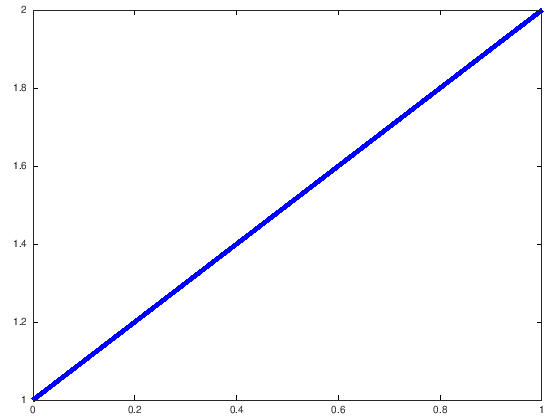

In [110]:
% vidimo da se rezultati poklapaju sa onima koje smo dobili rucno. Crtamo sada grafik resenja.
plot(X(1,:),Y(1,:), "linewidth",14, "color", "blue")

#### Pozvaćemo sada funkciju za gađanje, ali sa manjim $h$ i pomoću RK4 metoda. Cilj nam je da dobijemo kvalitetnije rešenje.

In [111]:
x0=0; % vrednost x u prvom granicnom uslovu.
y0=1; % vrednost y u prvom granicnom uslovu.
x1=1; % vrednost x u drugom granicnom uslovu
y1=2; % vrednost y u drugom granicnom uslovu
h=0.1;
pokusaji=[0,2]; % vrednosti pomocu kojih nisanimo, tj. ono sto biramo proizvoljno umesto pocetnih uslova koji nedostaju
[Y,X, pu]=gadjanje(x0,y0,x1,y1,h,'odj_sistem',2,pokusaji,'RungeKutta4_sistem')

dr_gran_uslovi =

   2.94873   0.00000

dr_gran_uslovi =

   2.9487   6.5755

p =

   1.8134   2.9487

pu = -0.52318
Y =

 Columns 1 through 8:

   1.00000   0.96673   0.96825   1.00060   1.06107   1.14806   1.26106   1.40060
  -0.52318  -0.15108   0.17483   0.46762   0.73904   1.00000   1.26095   1.53237

 Columns 9 through 11:

   1.56825   1.76673   2.00000
   1.82516   2.15107   2.52317

X =

 Columns 1 through 8:

   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000
   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000

 Columns 9 through 11:

   0.80000   0.90000   1.00000
   0.80000   0.90000   1.00000

pu = -0.52318


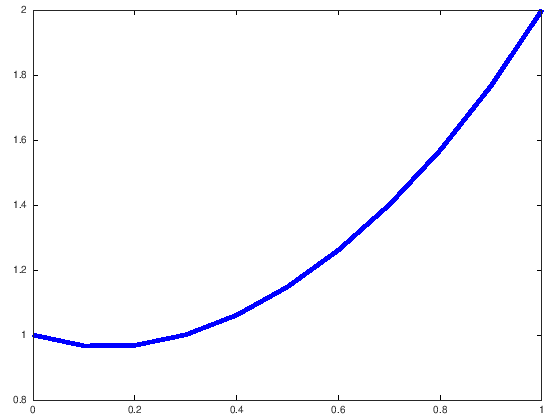

In [112]:
plot(X(1,:),Y(1,:), "linewidth",14, "color", "blue")

#### Drugi primer:
#### $$\ddot{y}+y=1, \hspace{0.5em} y(0)=-1,y(1)=2$$
#### Sistem dobijen nakon konverzije:
#### $$F(x,y)=\begin{bmatrix}\dot{y_1}\\\dot{y_2}\end{bmatrix}=\begin{bmatrix}y_2\\1-y_1\end{bmatrix} \hspace{0.8em} Y(0)=\begin{bmatrix}-1\\?\end{bmatrix}$$

In [114]:
function z=odj_sistem(x,y)
    z=zeros(2,1);
    z(1,1)=y(2);
    z(2,1)=1-y(1);
end

In [115]:
x0=0; % vrednost x u prvom granicnom uslovu.
y0=-1; % vrednost y u prvom granicnom uslovu.
x1=1; % vrednost x u drugom granicnom uslovu
y1=2; % vrednost y u drugom granicnom uslovu
h=0.1; % korisimo h=1 da proverimo resenje koje smo dobili rucno iznad
pokusaji=[0,4]; % vrednosti pomocu kojih nisanimo, tj. ono sto biramo proizvoljno umesto pocetnih uslova koji nedostaju
[Y,X, pu]=gadjanje(x0,y0,x1,y1,h,'odj_sistem',2,pokusaji,'RungeKutta4_sistem') % prosledili smo 'ojler_sistem' kao metod da bi potvrdili rucno resenje

dr_gran_uslovi =

  -0.080606   0.000000

dr_gran_uslovi =

  -0.080606   3.285276

p =

   0.841470  -0.080606

pu =  2.4726
Y =

 Columns 1 through 8:

  -1.00000  -0.74316  -0.46891  -0.17998   0.12075   0.43025   0.74545   1.06320
   2.47258   2.65990   2.82063   2.95319   3.05624   3.12875   3.17000   3.17957

 Columns 9 through 11:

   1.38031   1.69362   2.00000
   3.15738   3.10364   3.01889

X =

 Columns 1 through 8:

   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000
   0.00000   0.10000   0.20000   0.30000   0.40000   0.50000   0.60000   0.70000

 Columns 9 through 11:

   0.80000   0.90000   1.00000
   0.80000   0.90000   1.00000

pu =  2.4726


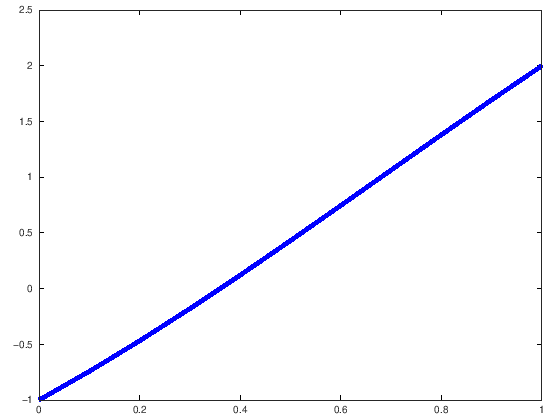

In [116]:
% vidimo da se rezultati poklapaju sa onima koje smo dobili kada smo ovaj primer radili postpuno ranije. Crtamo sada grafik resenja.
plot(X(1,:),Y(1,:), "linewidth",14, "color", "blue")

## Metod konačnih razlika

#### Ovaj metod drugačije pristupa problemu PGU. Proglem PGU konvertuje se u sistem algebarskih jednačina, a ne diferncijalnih kao kod metoda gađanja.
#### Rešenje PGU određuje se kao rešenje sistema algebarskih jedančina.
#### Postupak konverzije uključjuje više koraka koje ćemo prvo pokazati na primeru, kao kod metode gađanja:
#### Rešavamo sledeći problem:
#### $$\ddot{y}+2\dot{y}+y=x^2, \hspace{0.5em} y(0)=0.2,y(1)=0.8$$
#### Da bi diferncijalnu jedančinu konvertovali u algebarsku, moramo izvode da zanenimo nekim vrednostima.
#### Kao što sam naziv metoda kaže, izvode ćemo zameniti konačnim razlikama. Konačne razlike se koriste nako numerička zamena za anlitički izvod funkcije u tački, i predstavljaju količnik (razlomak) koji izračunava malu promenu vrednosti $y$ podeljenu sa malom promenom $x$. U nastavku navodimo formule za konačne razlike za prvi i drugi izvod, a na posebnom predavanju ćemo detaljno obraditi numeričko diferenciranje:
#### Recimo da imamo tačku $x_i$ za koju hoćemo da odredimo izvod fukciju $y=f(x)$. Za izračunavanje male promene vrednosti $x$ koristmo neku malu vrednost $h$:
#### $$x_{i+1}=x_i + h\\x_{i-1}=x_i - h$$
#### Formula za konačnu razliku za prvi izvod je:
#### $$\frac{y_{i+1}-y_{i-1}}{2h}$$
#### gde je: $y_i=f(x_i)$,  $y_{i+1}=f(x_{i+1})$, $x_{i+1}-x_{i-1}=2h$.
#### Formula za konačnu razliku za drugi izvod je:
#### $$\frac{y_{i+1}-2y_i-y_{i-1}}{h^2}$$
#### Zamenićemo sada konačne razlike u naš PGU problem:
#### $$\ddot{y}+2\dot{y}+y=x^2, \hspace{0.5em} y(0)=0.2,y(1)=0.8$$
#### $$\frac{y_{i+1}-2y_i-y_{i-1}}{h^2}+2\frac{y_{i+1}-y_{i-1}}{2h}+y_i=x_i^2, \hspace{0.5em} y(0)=0.2,y(1)=0.8$$
#### Sada treba da odredimo koje ćemo tačno tačke $x_i$ da koristimo. To radimo tako što uzimamo granične uslove kao kranje tačke, i onda interval $[0,1]$ delimo na delove veličine $h$.
#### Recimo da uzmemo da je $h=0.25$ onda imamo sledeće tačke:
#### $$x_0=0,x_1=0.25,x_2=0.5,x_3=0.75,x_4=1$$
#### Ubacićemo sada $h=0.25$ u PGU sa konačnim razlika i sredićemo malo jednačinu:
#### $$\frac{y_{i+1}-2y_i-y_{i-1}}{0.25^2}+2\frac{y_{i+1}-y_{i-1}}{0.50}+y_i=x_i^2, \hspace{0.5em} y(0)=0.2,y(1)=0.8$$
#### $$16(y_{i+1}-2y_i-y_{i-1})+8(y_{i+1}-y_{i-1})+y_i=x_i^2, \hspace{0.5em} y(0)=0.2,y(1)=0.8$$
#### $$24y_{i+1}-39y_i+16y_{i-1}=x_i^2, \hspace{0.5em} y(0)=0.2,y(1)=0.8$$
#### Sada treba da iskoristimo formulu $24y_{i+1}-39y_i+16y_{i-1}=x_i^2$ da formiramo sistem jednačina. Koliko nam jednačina treba? Hajde da vidimo koliko imamo nepoznatih. Prvo ćemo videti koje su nam tačke poznate. Poznati su nam granični uslovi, odnosno poznate su nam tačke:
#### $$y_{0}=0.2, y_{4}=0.8$$
#### Sve druge vrednosti $y_{i}$ su nam nepoznate:
#### $$y_{1}=?,y_{2}=?,y_{3}=?$$
#### Dakle imamo 3 nepoznate, pa nam treba 3 јеdnačine:
#### $$24y_{2}-39y_1+16y_0=x_1^2$$
#### $$24y_{3}-39y_2+16y_1=x_2^2$$
#### $$24y_{4}-39y_3+16y_2=x_3^2$$
#### Sređujemo malo jednačine pre nego što formiramo sistem u matričnom obliku:
#### $$24y_{2}-39y_1+16\cdot 0.2 =0.25^2$$
#### $$24y_{3}-39y_2+16y_1=0.5^2$$
#### $$24\cdot 0.8-39y_3+16y_2=0.75^2$$
#### Formiramo sistem:
#### $$A=\begin{bmatrix} -39 & 24 & 0\\ 16 & -39 & 24\\ 0 & 16 & -39 \end{bmatrix}b=\begin{bmatrix} 0.25 - 16\cdot 0.2\\ 0.5^2\\0.75^2- 24\cdot 0.8 \end{bmatrix}$$
#### Rešavamo sada sistem u kodu:

In [117]:
A=[-39 24 0;16 -39 24;0 16 -39]
b=[0.25-16*0.2 0.5^2 0.75-24*0.8]'
y=A\b

A =

  -39   24    0
   16  -39   24
    0   16  -39

b =

   -2.95000
    0.25000
  -18.45000

y =

   0.46812
   0.63778
   0.73473



#### Dobili smo vrednosti za tačke $y_{1},y_{2},y_{3},y_{4}$, tako da uz granične uslove sada imamo:
#### $$y_{0}=0.2,y_{1}=0.46812,y_{2}=0.63778,y_{3}=0.73473,y_{4}=0.8$$
#### Pronašli smo rešenje, odnosno aproksimirali smo funkciju $y$ u intervalu $[0,1]$. Prikazaćemo sada rešenje grafički.

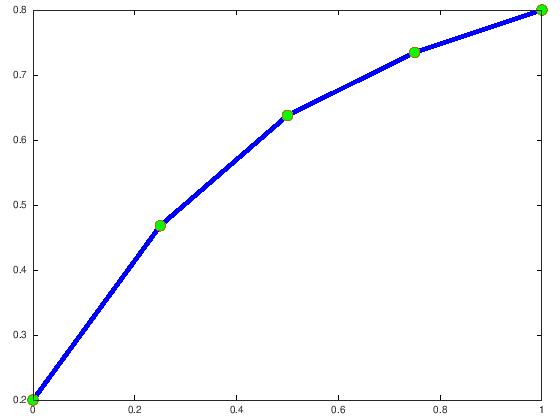

In [118]:
plot(0:0.25:1,[0.2 y' 0.8], "linewidth",14, "color", "blue")
hold on;
plot(0:0.25:1,[0.2 y' 0.8],'o','markersize', 10,'markerfacecolor','g');

#### Za kraj, sistematizujemo korake metoda konačnih razlika za rešavanje PGU:
#### Koristimo konačne razlike da zamenimo izvode. 
#### Biramo korak $h$ i tako dobijamo tačke koje koristimo tj. delimo interval sa graničnim uslovima na pod-intervale. Tako dobijamo sistem algebarskih jednačina.
#### Rešavamo sistem algebarskih jednačina da bi dobili rešenje PGU.